### Mount Google Drive to persist checkpoints

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install the package

In [2]:
! pip install git+https://github.com/divamgupta/image-segmentation-keras


  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-rovk1dl_
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-rovk1dl_
     |████████████████████████████████| 3.3MB 18.5MB/s 
     |████████████████████████████████| 952kB 37.6MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-cp37-none-any.whl size=34545 sha256=9820a6f19b9a47f8a611642cf57a1d6fe7fa7651d46ca44d67ffba90b6d7420a
  Stored in directory: /tmp/pip-ephem-wheel-cache-_ltn5hd1/wheels/a8/be/2c/1e1f0a75330e3ae33dd34c2ba085929eb7c7ae1d2184f4b7b5
Successfully built keras-segmentation
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.4.0 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully unin

### Download the dataset

In [6]:
# new dataset
!wget "https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/redacted?download=1" -O /content/dataset.zip
!unzip "/content/dataset.zip" -d "/content/"
# !mv /content/dataset-mapillary-vistas-v2/ /content/dataset
!mv /content/dataset-mapillary-vistas-v3/ /content/dataset

--2021-05-07 01:59:00--  https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/EeBCFqbN48NFl02Aswb7O3wByZ5ZOP_1mAOIj42bB1wA_A?download=1
Resolving queensuca-my.sharepoint.com (queensuca-my.sharepoint.com)... 13.107.136.9
Connecting to queensuca-my.sharepoint.com (queensuca-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/16drp4_queensu_ca/Documents/School%20Files/2020-2021,%20Fourth%20Year/CISC%20500/022%20-%20dataset-mapillary-vistas-v3.zip?originalPath=aHR0cHM6Ly9xdWVlbnN1Y2EtbXkuc2hhcmVwb2ludC5jb20vOnU6L2cvcGVyc29uYWwvMTZkcnA0X3F1ZWVuc3VfY2EvRWVCQ0ZxYk40OE5GbDAyQXN3YjdPM3dCeVo1Wk9QXzFtQU9JajQyYkIxd0FfQT9ydGltZT01RzcxcnZzUTJVZw [following]
--2021-05-07 01:59:00--  https://queensuca-my.sharepoint.com/personal/16drp4_queensu_ca/Documents/School%20Files/2020-2021,%20Fourth%20Year/CISC%20500/022%20-%20dataset-mapillary-vistas-v3.zip?originalPath=aHR0cHM6Ly9xdWVlbnN1Y2EtbXkuc2hhcmVwb2ludC5jb20vOnU6L2cvc

### Initialize the model

In [8]:
# https://github.com/divamgupta/image-segmentation-keras

from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=50 ,  input_height=320, input_width=640  )


### Train the model

In [9]:
model.train(
    train_images =  "/content/dataset/training/images/",
    train_annotations = "/content/dataset/training/labels/",
    checkpoints_path = "/content/drive/MyDrive/Masters/models/vgg_unet/model",
    epochs=5,
)

  1%|          | 12/1784 [00:00<00:15, 113.54it/s]

Verifying training dataset


100%|██████████| 1784/1784 [00:13<00:00, 128.59it/s]


Dataset verified! 
Epoch 1/5
512/512 [==============================] - 127s 174ms/step - loss: 1.2076 - accuracy: 0.8469

Epoch 00001: saving model to /content/drive/MyDrive/Masters/models/vgg_unet/model.00001
Epoch 2/5
512/512 [==============================] - 92s 180ms/step - loss: 0.0102 - accuracy: 0.9977

Epoch 00002: saving model to /content/drive/MyDrive/Masters/models/vgg_unet/model.00002
Epoch 3/5
512/512 [==============================] - 94s 183ms/step - loss: 0.0046 - accuracy: 0.9987

Epoch 00003: saving model to /content/drive/MyDrive/Masters/models/vgg_unet/model.00003
Epoch 4/5
512/512 [==============================] - 94s 183ms/step - loss: 0.0066 - accuracy: 0.9980

Epoch 00004: saving model to /content/drive/MyDrive/Masters/models/vgg_unet/model.00004
Epoch 5/5
512/512 [==============================] - 94s 183ms/step - loss: 0.0042 - accuracy: 0.9987

Epoch 00005: saving model to /content/drive/MyDrive/Masters/models/vgg_unet/model.00005


### Sample model predictions

In [10]:
out = model.predict_segmentation(
    inp="/content/dataset/validation/images/-4jzRzGfKmQg8RBNlNqnGQ.png",
    out_fname="/content/out.png"
)

In [11]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

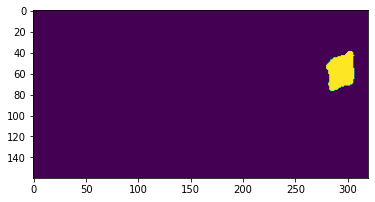

In [12]:
plt.imshow(out)

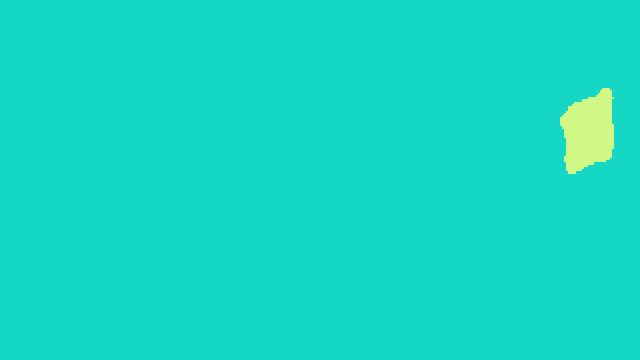

In [13]:
from IPython.display import Image
Image('/content/out.png')

In [14]:
o = model.predict_segmentation(
    inp="/content/dataset/validation/images/-4jzRzGfKmQg8RBNlNqnGQ.png",
    out_fname="/content/out.png" , overlay_img=True, show_legends=True,
    class_names = [ "Background", "Billboard"]
)

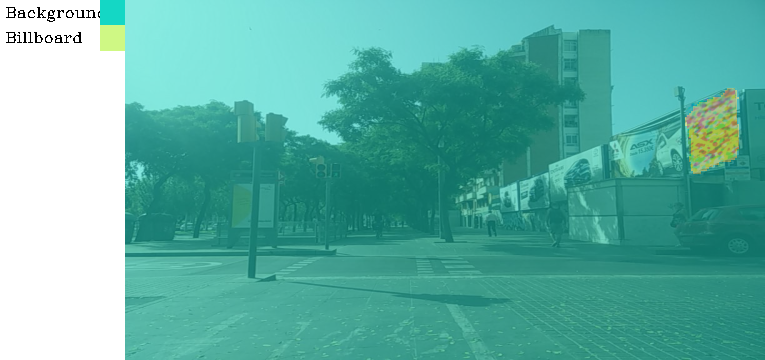

In [15]:
from IPython.display import Image
Image("/content/out.png")